# **Asignatura**: Aprendizaje Automático





# **Problema de clasificación**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar sistemas olfativos de Inteligencia Artificial mediante **narices electrónicas (*e-Nose*)**, capaces de determinar la calidad de una muestra de carne en base a los gases emitidos por la misma. El conjunto de datos se obteniene a partir de la investigación realizada en el siguiente artículo:

- Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222 (URL: <a href="https://www.mdpi.com/1424-8220/23/4/2222">https://www.mdpi.com/1424-8220/23/4/2222</a>)



## Contexto y motivación del problema

Los controles de calidad alimentarios son un conjunto de procedimientos y normativas que se implementan para asegurar que los alimentos sean seguros, saludables y cumplan con los estándares establecidos. Esto incluye la supervisión de la producción, el procesamiento, el almacenamiento y la distribución de los alimentos.

Los controles de calidad pueden abarcar desde la inspección de las materias primas hasta la evaluación del producto final, asegurando que no haya contaminantes y que se mantengan las propiedades nutricionales. Normalmente, el proceso de control de calidad conlleva la toma de muestras de alimentos, su transporte a un laboratorio, la realización de diferentes análisis químicos sobre el alimento y la generación de informes positivos o negativos.

Como alternativa a este proceso, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **sistemas olfativos electrónicos (*e-Noses*)** sensibles a los gases que pueden generar diferentes alimentos frescos o en descomposición. En particular, **nos crentraremos en la clasificación de la calidad de cortes de carne** haciendo uso de diferentes gases generados durante el proceso de descomposición de la misma.

Una **e-Nose** (*nariz electrónica*) es un dispositivo diseñado para detectar y analizar olores de manera similar a como lo hace el sentido del olfato en los seres humanos. Utilizan sensores químicos que pueden identificar diferentes compuestos volátiles en el aire (gases).

Estos dispositivos son muy útiles en diversas aplicaciones, como en la industria alimentaria para controlar la calidad de los productos, en la detección de contaminantes en el medio ambiente, o incluso en la medicina para identificar enfermedades a través del análisis de olores específicos.

La tecnología detrás de las narices electrónicas puede variar. En general, combinan sensores, algoritmos de procesamiento de datos y aprendizaje automático para interpretar los olores y proporcionar información útil.

<center>
<img src="https://cdn.open-pr.com/V/5/V505414311_g.jpg" />
</center>

## El conjunto de datos

El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS">https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS</a>.


Se trata de un conjunto de datos que contiene 12 tipos de cortes de carne diferentes (redondo, solomillo superior, filete de lomo, carne de aleta, lomo corto, falda, terrón, carne de falta, interior/exterior, costillas, espinilla y grasa). Los cortes fueron monitorizados durante 37h hasta su deterioro utilizando 11 tipos de sensores de gas distintos. En cada medición, se asignó una categoría del estado de la carne con 4 etiquetas indicando la calidad "excelente", "buena", "aceptable" y "estropeada".


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores. El modelo de decisión para determinar el estado de la carne a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar ha sido preprocesado y extraído a partir de los datos originales, y tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de medición de cada tipo de sensor de gas (en total 11 tipos distintos).
- **Datos de salida (Y)**: Clasificación del tipo de carne.


El conjunto de datos a usar en la práctica se encuentra accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [1]:
import pandas as pd

path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

df= pd.read_csv(path_to_data_classification)
df.head(5)


,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.



# *Descripciones iniciales*

---



En este proyecto utilizamos los datos de una nariz electrónica para clasificar la calidad de una muestra de carne en función de los gases emitidos por la carne.

Estos se recogieron en el estudio realizado en el artículo: Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222

En nuestro conjunto de datos encontramos, por tanto, 11 tipos diferentes de sensores de gas y 12 tipos diferentes de cortes de carne monitorizados durante 37 horas hasta su deterioro.

Para cada medición, se asignó una categoría de estado de la carne con 4 etiquetas que indicaban la calidad «excelente», «buena», «aceptable» y «estropeada».


---
#*1.0*  
#Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.

---



Por lo tanto, realizaré un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores.

Para empezar, decido utilizar dos funciones de pandas para obtener la primera información sobre mi conjunto de datos, concretamente "df.info()" y "df.describe()"

Con la primera ya obtengo información importante, de hecho, me doy cuenta de que no faltan datos en mi conjunto de datos y que tengo un total de 2400 mediciones en mis 11 sensores. También obtengo el peso del fichero y el tipo de datos que contiene.

Con la segunda función, obtengo información más detallada sobre mi conjunto de datos, de hecho, muestro una tabla resumen inicial con un resumen de las principales mediciones. Puedo consultar rápidamente medidas como la media, los máximos, los mínimos y la distribución de los datos.

También decido crear una representación gráfica de la distribución de frecuencias de cada uno de mis sensores para anotar cualquier desequilibrio o detalle que pueda necesitar en el futuro. Por ejemplo, ya puedo ver que MQ5 y MQ9 son sensores con poca varianza, casi todos los datos se concentran cerca de la media, cosa que no ocurre en MQ8 y MQ136 donde los datos están repartidos a mayor escala.

Dado este problema con MQ8 quiero comprobar si hay valores atípicos, utilizo la biblioteca matploplib para crear un boxplot y ver gráficamente lo que ocurre, observo posibles valores atípicos por encima de 30.

De momento tomo nota de este análisis, pero no tomo ninguna acción al respecto.


Termino aquí esta primera fase de análisis.

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MQ135   2400 non-null   float64
 1   MQ136   2400 non-null   float64
 2   MQ137   2400 non-null   float64
 3   MQ138   2400 non-null   float64
 4   MQ2     2400 non-null   float64
 5   MQ3     2400 non-null   float64
 6   MQ4     2400 non-null   float64
 7   MQ5     2400 non-null   float64
 8   MQ6     2400 non-null   float64
 9   MQ8     2400 non-null   float64
 10  MQ9     2400 non-null   float64
 11  Cut     2400 non-null   object 
 12  Label   2400 non-null   object 
dtypes: float64(11), object(2)
memory usage: 243.9+ KB


,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,12.867592,8.653604,16.154671,12.335779,6.928496,14.679063,6.528142,15.001271,16.379921,35.730154,12.122863
std,2.828903,6.989394,5.454674,2.669185,1.560192,3.434043,3.498708,5.015889,6.164918,6.735156,2.168585
min,8.030000,2.780000,3.160000,7.700000,3.870000,7.880000,2.230000,5.600000,2.910000,15.990000,8.230000
25%,10.570000,5.250000,13.040000,10.310000,5.720000,12.680000,4.660000,11.460000,15.202500,31.570000,10.410000
50%,12.920000,6.800000,17.000000,12.050000,6.750000,14.470000,5.410000,14.390000,16.340000,36.780000,11.800000
75%,14.400000,8.070000,19.930000,13.820000,7.490000,15.987500,7.530000,17.820000,18.170000,41.320000,13.610000
max,20.510000,39.030000,28.670000,19.910000,12.640000,29.670000,24.250000,32.610000,41.050000,49.170000,18.170000


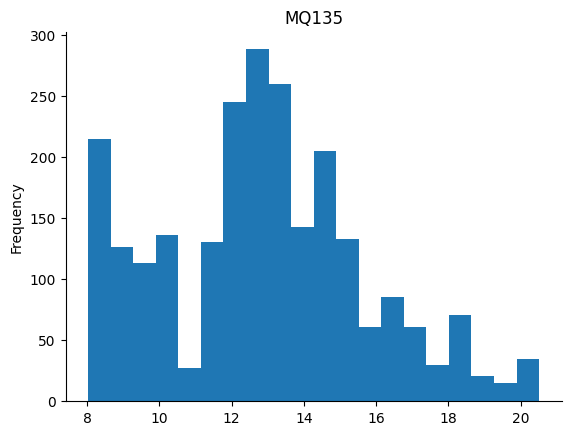

In [3]:
from matplotlib import pyplot as plt
df['MQ135'].plot(kind='hist', bins=20, title='MQ135')
plt.gca().spines[['top', 'right',]].set_visible(False)

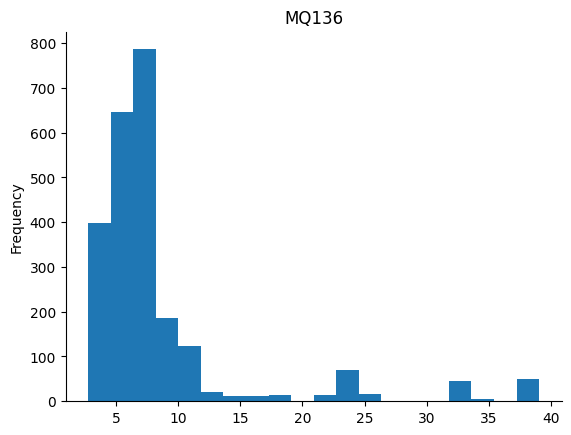

In [ ]:
from matplotlib import pyplot as plt
df['MQ136'].plot(kind='hist', bins=20, title='MQ136')
plt.gca().spines[['top', 'right',]].set_visible(False)

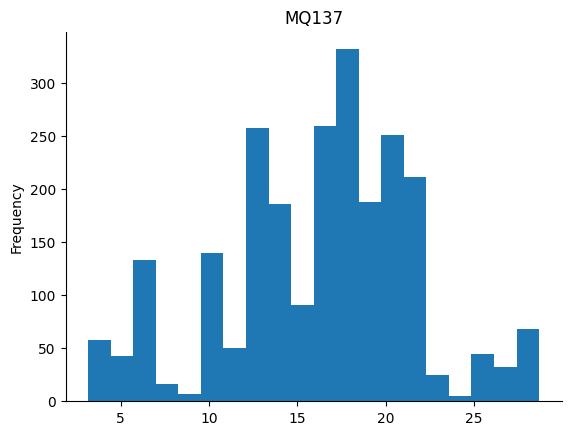

In [ ]:
from matplotlib import pyplot as plt
df['MQ137'].plot(kind='hist', bins=20, title='MQ137')
plt.gca().spines[['top', 'right',]].set_visible(False)

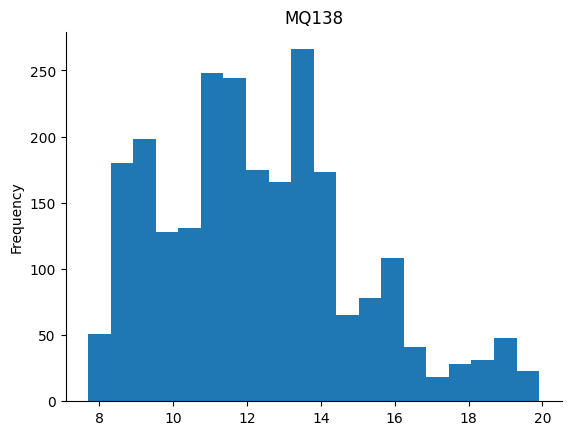

In [ ]:
from matplotlib import pyplot as plt
df['MQ138'].plot(kind='hist', bins=20, title='MQ138')
plt.gca().spines[['top', 'right',]].set_visible(False)

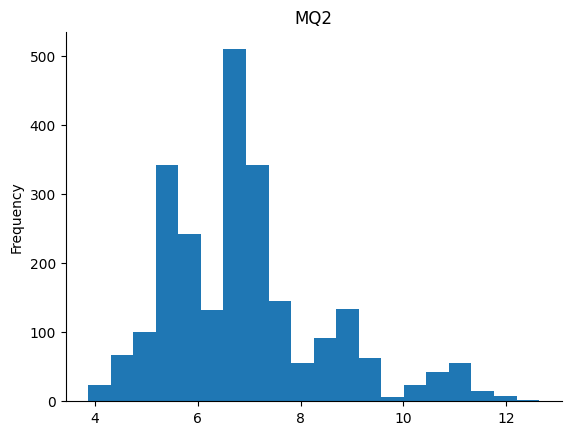

In [ ]:
from matplotlib import pyplot as plt
df['MQ2'].plot(kind='hist', bins=20, title='MQ2')
plt.gca().spines[['top', 'right',]].set_visible(False)

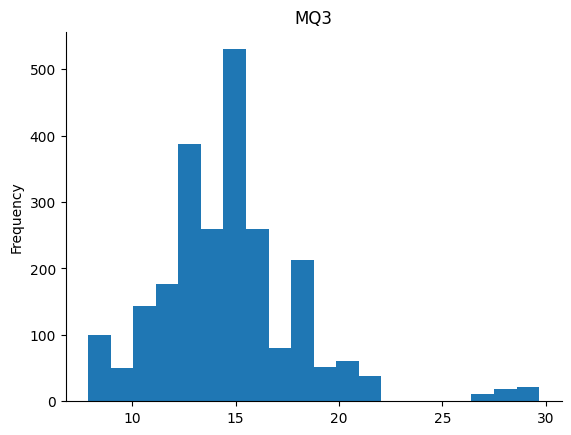

In [ ]:
from matplotlib import pyplot as plt
df['MQ3'].plot(kind='hist', bins=20, title='MQ3')
plt.gca().spines[['top', 'right',]].set_visible(False)

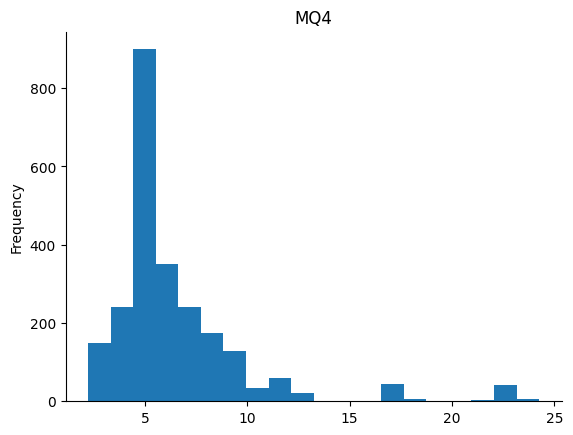

In [ ]:
from matplotlib import pyplot as plt
df['MQ4'].plot(kind='hist', bins=20, title='MQ4')
plt.gca().spines[['top', 'right',]].set_visible(False)

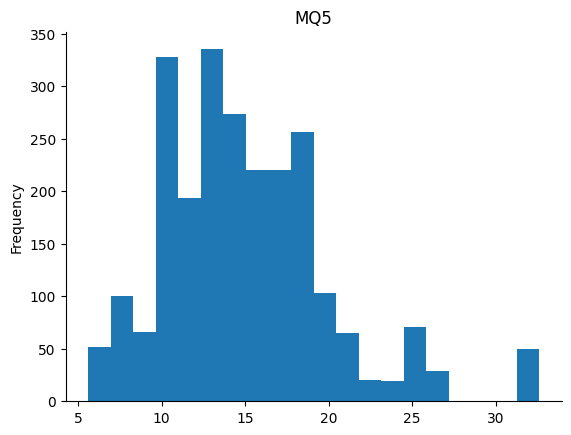

In [ ]:
from matplotlib import pyplot as plt
df['MQ5'].plot(kind='hist', bins=20, title='MQ5')
plt.gca().spines[['top', 'right',]].set_visible(False)

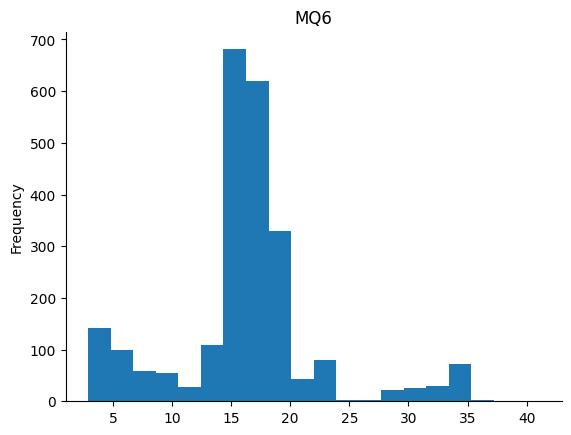

In [ ]:
from matplotlib import pyplot as plt
df['MQ6'].plot(kind='hist', bins=20, title='MQ6')
plt.gca().spines[['top', 'right',]].set_visible(False)

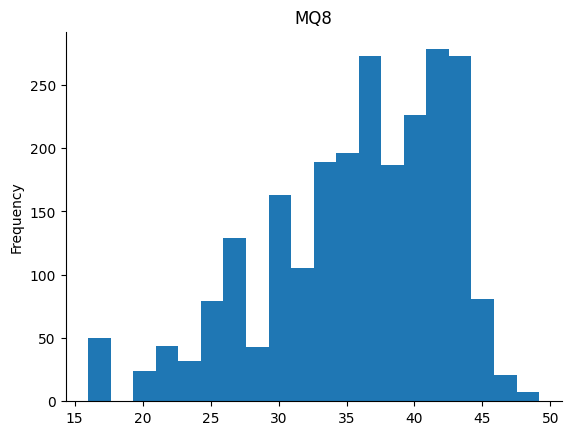

In [ ]:
from matplotlib import pyplot as plt
df['MQ8'].plot(kind='hist', bins=20, title='MQ8')
plt.gca().spines[['top', 'right',]].set_visible(False)

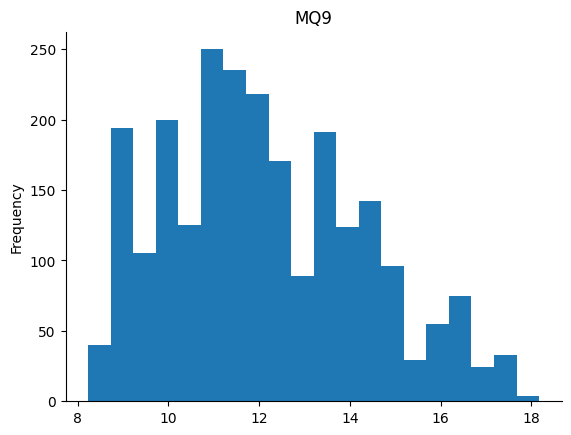

In [ ]:
from matplotlib import pyplot as plt
df['MQ9'].plot(kind='hist', bins=20, title='MQ9')
plt.gca().spines[['top', 'right',]].set_visible(False)

# *2.0*

---

#Preprocesado de datos


---
El preprocesamiento es una fase clave, aquí proceso los datos para prepararlos lo mejor posible para su posterior análisis.
Mi primer paso fue dividir mi conjunto de datos en entrenamiento y pruebas. Los datos de prueba no se utilizarán nunca, salvo para las pruebas finales; todo el preprocesamiento se realiza en el 80% del conjunto de datos completo.

A continuación normalicé los datos numericos entre 0 y 1. Por esto utilizo la biblioteca sklearn con el método MinMaxscaler y guardo todo en la variable 'X_train_scaled'.
El siguente paso fue buscar posibles valores anómalos, para ello creé una primera representación gráfica con la ayuda de mathploplib de las distribuciones de los datos de todos los sensores, obviamente sin tener en cuenta las dos últimas columnas objetivo.

Inmediatamente pude darme cuenta de la presencia de valores atípicos.

Al principio, pensé en eliminar los valores atípicos de cada columna que eran específicos de ese sensor, como los valores superiores a 0,8 en el caso del sensor «MQ6», o los valores superiores a 0,7 en el caso del sensor «MQ136», pero esto podría haber creado un desequilibrio en mi conjunto de datos y problemas relacionados. Por lo tanto, decidí sacrificar un poco la calidad de los datos y utilicé la técnica del cuantil. En concreto, calculé los cuantiles de 25 y 75, con lo que obtuve la parte media de mis datos y pude evitar posibles valores atípicos inferiores y superiores, aunque los superiores son los que más se dan.

A continuación, imprimí el número de datos que quedaban después de la limpieza (1321) y creé otro gráfico para representar de nuevo las frecuencias

(varias veces durante el código se encontrará restos de mis pruebas en el código para comprobar la tendencia correcta, como el tamaño de las variables manejadas hasta el momento)


Para seguir el preprocesamiento correcto, una vez que he limpiado los datos, me centro en ver su estructura más interna. Aplico entonces la validación cruzada para asegurarme también de que los datos están limpios y listos para el entrenamiento, reduciendo así el riesgo de que el modelo aprenda a partir de datos sucios o poco representativos. Además, empiezo a obtener una estimación del rendimiento del modelo que sea fiable y representativa de su capacidad para generalizar a datos no vistos.

En este punto, todo está listo para construir una matriz de correlaciones y observar posibles relaciones fuertes entre mis sensores, lo que me permitiría reducir la dimensionalidad y trabajar con un conjunto de datos más «ligero».

Utilizo seaborn y las columnas numéricas del conjunto de datos df_cleaned que son los datos normalizados y limpiados.  Observo, por ejemplo, que MQ136 y MQ138 tienen un índice de correlación muy alto.

Por tanto, me parece adecuado aplicar la reducción de dimensionalidad mediante la técnica PCA. Para una mayor optimización, al principio sólo calculo los componentes principales sin transformar los datos, y luego creo un gráfico de la varianza explicada con el fin de identificar el número de variables que tienen más probabilidades de ser representativas de mi conjunto de datos, observando aproximadamente, deduzco que ya 6 componentes pueden representar alrededor del 95% de mi conjunto de datos así que sólo ahora aplico la transformación.

Para estar seguro, compruebo de nuevo el tamaño de los conjuntos con los que estoy trabajando para asegurarme de que mi trabajo va bien.

El último paso de mi preprocesamiento consiste en dividir mi conjunto de entrenamiento en conjunto de entrenamiento y validación. Se trata de una práctica muy útil, no sólo porque me permite probar el modelo en desarrollo, sino también comprobar si hay sobreajuste y evaluar el trabajo realizado.
Una vez más, divido entre un 80% de entrenamiento y un 20% de validación


In [4]:
from sklearn.model_selection import train_test_split


# Identifico la columna de etiquetas
y = df['Label']
X = df.drop(columns=["Cut", "Label"])

# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Muestra las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (1920, 11)
Tamaño del conjunto de prueba: (480, 11)


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Se seleccionan todas las columnas numéricas (float e int)
numeric_columns = X_train.select_dtypes(include=[float, int]).columns

# Se crea la instancia del escalador
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Se aplica la normalización solo a las columnas numéricas
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=numeric_columns)


# se muestran las dimensiones del dataset normalizado
print(f"Tamaño de X_train_scaled: {X_train_scaled.shape}")
print(f"Tamaño de y_train: {y_train.shape}")

Tamaño de X_train_scaled: (1920, 11)
Tamaño de y_train: (1920,)


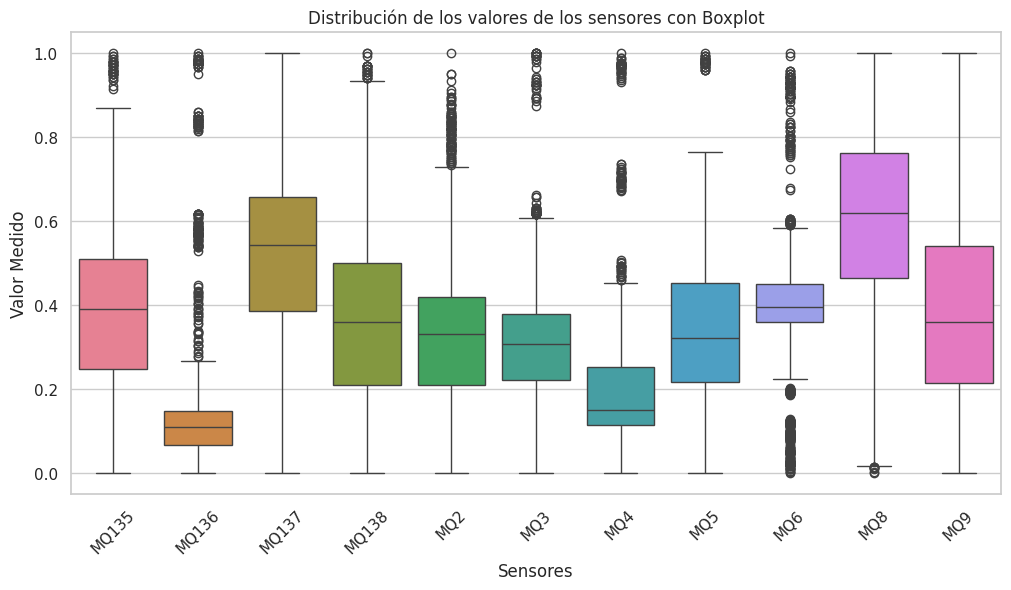

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Crea un DataFrame de Pandas a partir de los datos de entrenamiento normalizados, utilizando los nombres de las columnas especificados
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns)

# Establece el tamaño de la figura
plt.figure(figsize=(12, 6))

# Establece el estilo del gráfico
sns.set(style="whitegrid")

# Crea el diagrama de caja utilizando los datos normalizados
sns.boxplot(data=X_train_scaled_df)

# Rota las etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Establece el título y las etiquetas de los ejes
plt.title("Distribución de los valores de los sensores con Boxplot")
plt.xlabel("Sensores")
plt.ylabel("Valor Medido")

# Muestra el gráfico
plt.show()

Tamaño después de la limpieza: (1321, 11)
Tamaño de y_train realineado: (1321,)
Tamaño de X_train_scaled: (1920, 11)


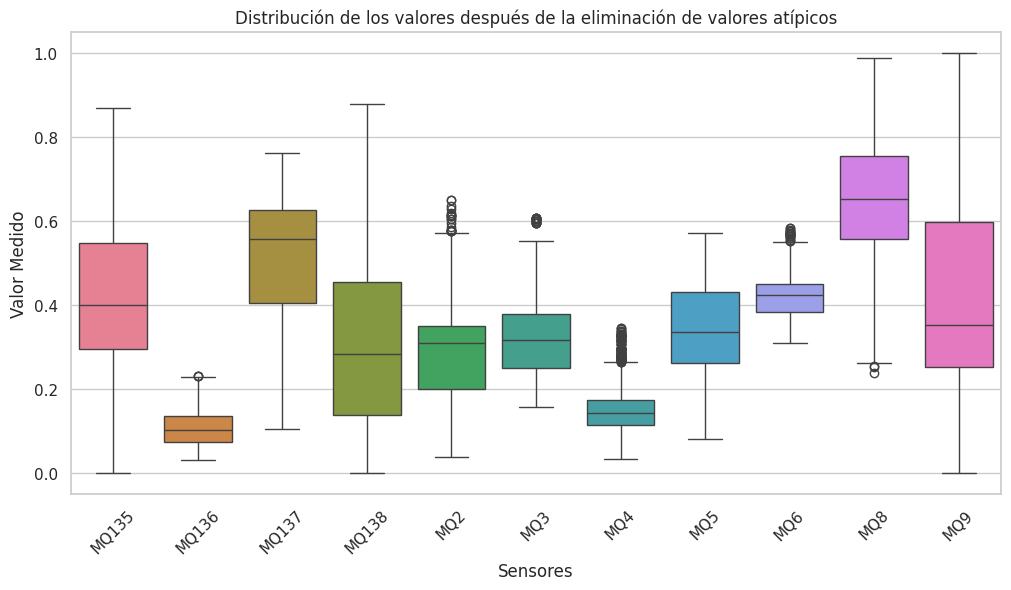

In [7]:
def remove_outliers_iqr(data):
    df_cleaned = data.copy()
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

# Se eliminan los valores atípicos y se mantienen los índices originales
df_cleaned = remove_outliers_iqr(X_train_scaled)

# Se realinea y_train utilizando los índices de df_cleaned
y_train_cleaned = y_train.loc[df_cleaned.index]

# Se verifica el tamaño
print(f"Tamaño después de la limpieza: {df_cleaned.shape}")
print(f"Tamaño de y_train realineado: {y_train_cleaned.shape}")
print(f"Tamaño de X_train_scaled: {X_train_scaled.shape}")

# Se utiliza un diagrama de caja para visualizar los datos limpios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Distribución de los valores después de la eliminación de valores atípicos")
plt.xlabel("Sensores")
plt.ylabel("Valor Medido")
plt.show()

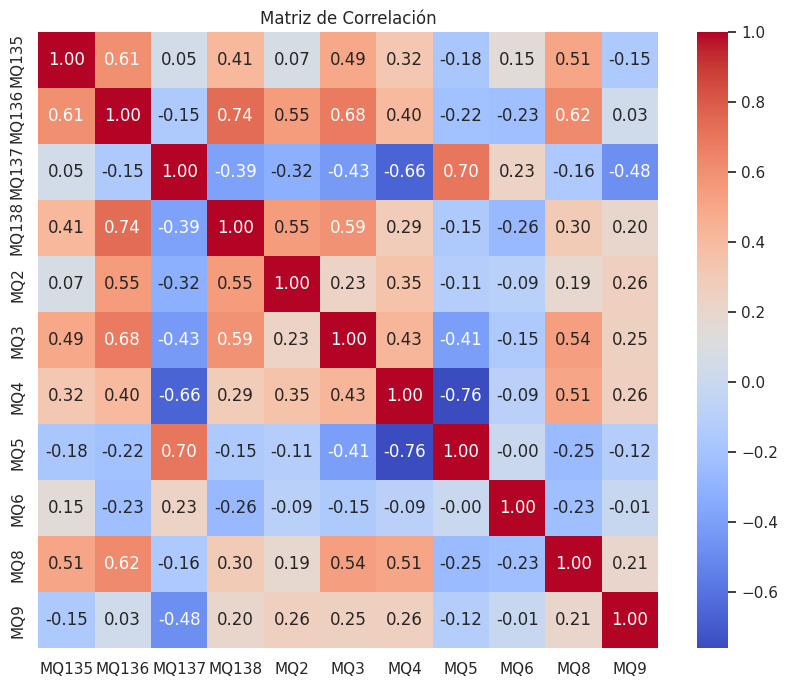

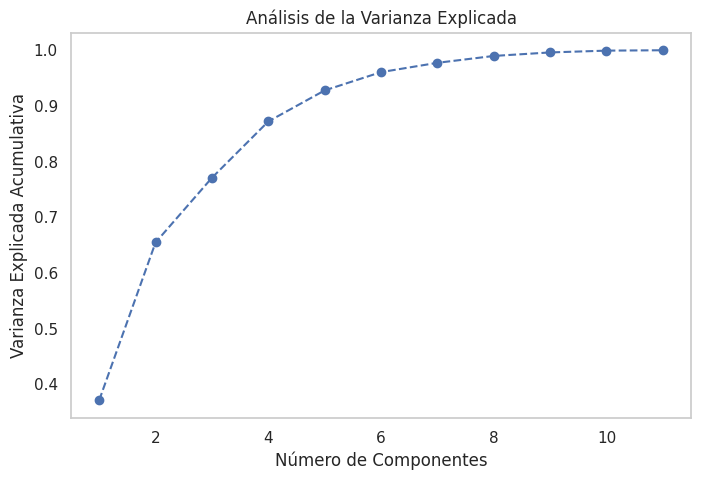

Número de componentes elegido: 6
Conjunto de datos transformado con PCA: (1321, 6)
Tamaño de y_train_cleaned: (1321,)


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Configuración de la validación cruzada (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creación de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Análisis de la varianza explicada antes del PCA
pca_full = PCA()
pca_full.fit(df_cleaned)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulativa")
plt.title("Análisis de la Varianza Explicada")
plt.grid()
plt.show()

# Reducción dimensional eligiendo el número de componentes
n_components = 6
pca = PCA(n_components)
X_train_pca = pca.fit_transform(df_cleaned)

# Alinea y_train con df_cleaned
y_train_cleaned = y_train.loc[df_cleaned.index]

# Verificación de tamaños
print(f"Número de componentes elegido: {n_components}")
print(f"Conjunto de datos transformado con PCA: {X_train_pca.shape}")
print(f"Tamaño de y_train_cleaned: {y_train_cleaned.shape}")

In [9]:
from sklearn.model_selection import train_test_split

# División del conjunto de entrenamiento reducido en conjunto de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_pca, y_train_cleaned, test_size=0.2, stratify=y_train_cleaned, random_state=42
)

# Verificación de tamaños después de la división
print(f"Tamaño del conjunto de entrenamiento: {X_train_split.shape}, {y_train_split.shape}")
print(f"Tamaño del conjunto de validación: {X_val_split.shape}, {y_val_split.shape}")

# Convertir X_test_scaled en DataFrame para preservar los nombres de las características
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=df_cleaned.columns)

# Aplicar PCA a los datos de prueba escalados
X_test_pca = pca.transform(X_test_scaled_df)

# Verificación final de tamaños
print(f"Tamaño del conjunto de prueba: {X_test_pca.shape}")

Tamaño del conjunto de entrenamiento: (1056, 6), (1056,)
Tamaño del conjunto de validación: (265, 6), (265,)
Tamaño del conjunto de prueba: (480, 6)


#*3.0*

---
#Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un  ensemble .


---

Para esta parte del problema, los modelos de aprendizaje automático fueron: Decision Tree, SVM, Random Forest.

Toda la información sobre la construcción se encontró en línea, especialmente en la página principal de sklearn.

El proceso de construcción es prácticamente idéntico en todos los casos. Inicialmente se crea el modelo y se realiza una validación cruzada inicial en el conjunto de entrenamiento, este es un enfoque muy fuerte ya que me permite tener una primera estimación de cómo mi modelo podría abordar los nuevos datos, al mismo tiempo trato el problema en varios niveles con el fin de terminar con un modelo robusto y fiable.
Una vez finalizado el entrenamiento de mi modelo básico, imprimo todos los reportes con la función classification_report de scikit-learn para analizar los resultados y poder visualizarlos en una matriz de confusión.

En concreto, classification_report incluye varias métricas de evaluación para cada clase del problema de clasificación.

Una primera métrica es la precisión, que representa la proporción de verdaderos positivos con respecto al número total de predicciones positivas. Indica cuántos de los ejemplos clasificados como positivos son realmente positivos.

La segunda es recall, que en cambio es la proporción de verdaderos positivos respecto al total de verdaderos positivos. Indica cuántos de los ejemplos positivos fueron identificados correctamente por el modelo. En la tabla que imprimirá el método, la última métrica será la F1 score, que es una métrica de evaluación utilizada para medir el equilibrio entre precisión y recall en un modelo de clasificación, lo que garantizaría un modelo más robusto en todos los casos de datos. Al final, una columna «soporte» nos indicará la suma del número de ocurrencias de cada clase en el conjunto de datos de prueba

Al final encontramos una parte más resumida con métricas globales, concretamente: La precisión global, la macro media que calcula la media de las métricas (accuracy, recall, F1-score) pero no tiene en cuenta el soporte, esto es muy útil para evaluar el equilibrio entre las clases. Por último tenemos la media ponderada que tiene en cuenta el soporte de cada clase, proporcionando una media ponderada de las métricas, esto puede ser muy útil cuando las clases están desequilibradas.


El primer modelo utilizado es un Random Forest, que puede utilizarse tanto para problemas de clasificación como de regresión.

Se trata de una estructura en forma de árbol en la que los nodos interiores representan las características de un conjunto de datos, las ramas representan las reglas de decisión y cada hoja representa un resultado.

El árbol comienza con un nodo raíz que representa todo el conjunto de datos. A partir de ahí, el conjunto de datos se divide según una característica que proporciona la mejor separación entre clases, mientras que cada nodo interior representa una característica del conjunto de datos y una prueba sobre esa característica. A continuación tenemos las ramas que representan el resultado de la prueba sobre una característica. Cada rama conduce a un nuevo nodo o hoja.

Por último, las hojas representan la decisión o predicción final. En el caso de la clasificación, una hoja representa una clase

Mi código comienza creando un árbol de decisión que utiliza la entropía como criterio para medir la calidad de las divisiones, mientras que un valor fijo de random_state garantiza que los resultados sean reproducibles.

La entropía mide la incertidumbre o el desorden en un sistema y se utiliza para elegir qué característica se debe adoptar para dividir los datos en cada nodo. El objetivo es reducir la entropía, es decir, aumentar el orden, en cada subdivisión. Además, al construir un árbol de decisión, se busca maximizar la ganancia de información, que es la reducción de entropía que se consigue al dividir los datos según una característica.
El siguiente paso en mi código es utilizar la validación cruzada estratificada para evaluar el modelo, este método consiste en dividir el conjunto de datos en 5 partes (pliegues) y garantiza que cada pliegue tenga una representación proporcional de las clases. A continuación se calculan la precisión media y la desviación estándar para evaluar el rendimiento del modelo.

El resultado obtenido es de 0,96 con una tolerancia de 0,01. Es un resultado muy bueno y me permite proceder con confianza.

Es el momento de entrenar el modelo con el nuevo conjunto de entrenamiento, que se ha dividido por segunda vez, e inmediatamente después lo evalúo en el conjunto de validación. Aquí, la precisión de la evaluación alcanza el 97%, lo que me hace pensar en un ligero sobreajuste, pero aun así procedo a clasificar la prueba, donde el porcentaje desciende al 86%. Este valor me satisface plenamente, ya que también se trata de un modelo entrenado sin hiperparámetros.

En general, se aprecia una mejor tendencia del modelo a cometer menos errores en el caso de la carne en mal estado con un total de 118/120 aciertos

Árbol de Decisión - Precisión media en validación cruzada: 0.96 ± 0.01
Árbol de Decisión - Precisión en Conjunto de Validación: 0.97
Árbol de Decisión - Precisión en Conjunto de Prueba: 0.86
Árbol de Decisión - Informe de Clasificación:
              precision    recall  f1-score   support

  Acceptable       0.90      0.82      0.86       120
   Excellent       0.87      0.87      0.87       120
        Good       0.82      0.78      0.80       120
     Spoiled       0.86      0.98      0.92       120

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



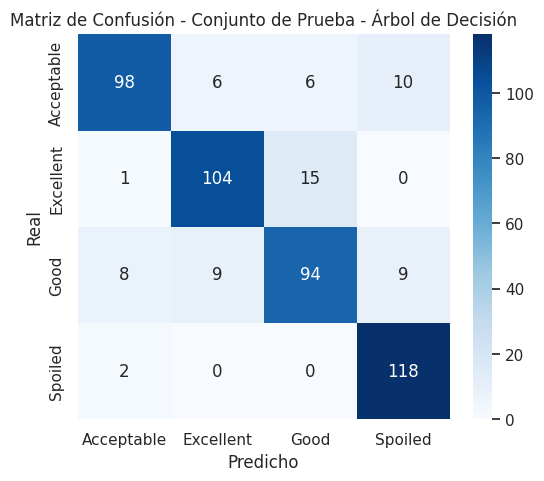

In [13]:
######              #####
###### Decision Tree
######              #####
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creación del modelo Árbol de Decisión
model_dt = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Validación cruzada en el conjunto de entrenamiento
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_dt, X_train_split, y_train_split, cv=cv, scoring='accuracy')
print(f'Árbol de Decisión - Precisión media en validación cruzada: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

# Entrenamiento del modelo
model_dt.fit(X_train_split, y_train_split)

# Predicción en el conjunto de validación
y_val_pred = model_dt.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Árbol de Decisión - Precisión en Conjunto de Validación: {val_accuracy:.2f}')

# Evaluación en el conjunto de prueba
y_pred = model_dt.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Árbol de Decisión - Precisión en Conjunto de Prueba: {accuracy:.2f}')
print(f'Árbol de Decisión - Informe de Clasificación:\n{class_report}')

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Prueba - Árbol de Decisión')
plt.show()

Una máquina de vectores soporte es un algoritmo que se utiliza principalmente para problemas de clasificación, aunque también puede adaptarse para la regresión. La idea principal de una SVM es encontrar un hiperplano en un espacio N-dimensional, bidimensional en nuestro caso, que separe claramente los datos en diferentes clases. La SVM busca maximizar el margen entre clases, es decir, la distancia entre el hiperplano (la línea en nuestro caso) y los puntos de datos más cercanos de cada clase, conocidos como vectores de soporte; un margen más amplio es sinónimo de un modelo más robusto.

En cuanto a mi código, empiezo como siempre por crear el modelo, luego la validación cruzada y el entrenamiento, el planteamiento es idéntico al caso anterior


Con SVM, los resultados son aún mejores ya con un modelo básico. También en este caso, el modelo logra un mejor resultado en la validación, esta vez clasificando perfectamente con una tasa de acierto del 100%. En la prueba, de un total de 265 evaluaciones, sólo una vece se equivoca el modelo y predice como aceptable una carne que debería ser estropeada. Los resultados son excelentes

SVM - Precisión media en validación cruzada: 0.97 ± 0.02
SVM - Precisión en Conjunto de Validación: 1.00
SVM - Informe de clasificación en Conjunto de Validación:
              precision    recall  f1-score   support

  Acceptable       0.99      1.00      0.99        79
   Excellent       1.00      1.00      1.00        51
        Good       1.00      1.00      1.00        70
     Spoiled       1.00      0.98      0.99        65

    accuracy                           1.00       265
   macro avg       1.00      1.00      1.00       265
weighted avg       1.00      1.00      1.00       265



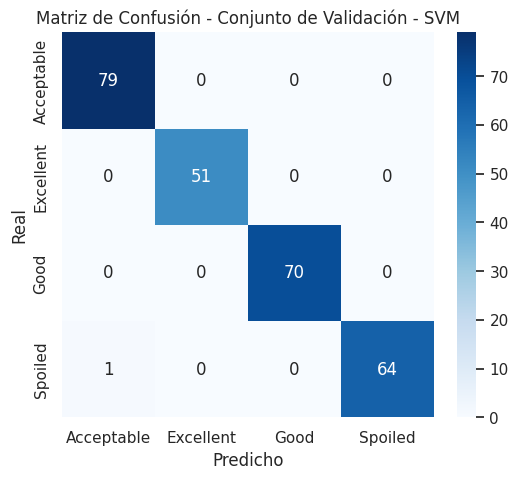

SVM - Precisión en Conjunto de Prueba: 0.89
SVM - Informe de clasificación en Conjunto de Prueba:
              precision    recall  f1-score   support

  Acceptable       0.85      0.86      0.85       120
   Excellent       0.89      1.00      0.94       120
        Good       1.00      0.78      0.87       120
     Spoiled       0.85      0.93      0.88       120

    accuracy                           0.89       480
   macro avg       0.90      0.89      0.89       480
weighted avg       0.90      0.89      0.89       480



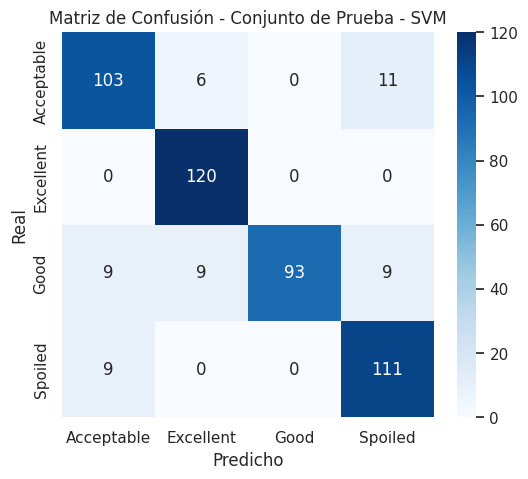

In [11]:
######    ######
###### SVM
######    ######

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creación del modelo SVM
model_svm = SVC(probability=True, random_state=42)

# Validación cruzada en el conjunto de entrenamiento
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_svm, X_train_split, y_train_split, cv=cv, scoring='accuracy')
print(f'SVM - Precisión media en validación cruzada: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

# Entrenamiento del modelo
model_svm.fit(X_train_split, y_train_split)

# Predicción en el conjunto de validación
y_val_pred = model_svm.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_class_report = classification_report(y_val_split, y_val_pred)
val_conf_matrix = confusion_matrix(y_val_split, y_val_pred)
print(f'SVM - Precisión en Conjunto de Validación: {val_accuracy:.2f}')
print(f'SVM - Informe de clasificación en Conjunto de Validación:\n{val_class_report}')

# Visualización de la matriz de confusión para el conjunto de validación
plt.figure(figsize=(6, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val_split), yticklabels=np.unique(y_val_split))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Validación - SVM')
plt.show()

# Evaluación en el conjunto de prueba
y_pred = model_svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'SVM - Precisión en Conjunto de Prueba: {accuracy:.2f}')
print(f'SVM - Informe de clasificación en Conjunto de Prueba:\n{class_report}')

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Prueba - SVM')
plt.show()

El Random Forest es un conjunto de árboles de decisión. Este modelo construye un «bosque» de árboles de decisión y combina sus predicciones para mejorar la precisión y controlar el sobreajuste. Cada árbol del bosque se construye utilizando una muestra aleatoria de los datos y una selección aleatoria de características. Para ello, se utiliza un método de muestreo llamado Bootstrap, que consiste en extraer muestras aleatorias con reemplazo, lo que significa que algunas muestras pueden aparecer más de una vez, mientras que otras pueden no incluirse.

Así, para cada muestra de datos se construye un árbol de decisión. Durante la construcción de cada árbol, en lugar de considerar todas las características disponibles para la partición, el Random Forest selecciona aleatoriamente un subconjunto de características. Esto ayuda a que los árboles sean más diversos y reduce la correlación entre ellos.

Para la clasificación, cada árbol proporciona una «calificación» para la clase final, y la clase con el mayor número de calificaciones se elige como predicción final.

El Random Forest también proporciona una medida de la importancia de las características, que indica cuánto contribuye cada característica a la predicción final, además es muy insensible al sobreajuste ya que promedia las predicciones de varios árboles, al mismo tiempo, sin embargo, paga por una mayor complejidad que los otros modelos discutidos anteriormente

En cuanto al código, se utiliza el mismo enfoque que el explicado para los modelos anteriores, el bosque aleatorio se crea en una versión completamente básica y aquí también tenemos excelentes resultados en el conjunto de validación, que se clasifica casi perfectamente con una precisión media del 99% de 265 casos.

En el conjunto de prueba volvemos a reducir los resultados al 87%. Esta diferencia se explica por el tamaño del conjunto, que varía de 265 a 480.

En cualquier caso, los resultados siguen siendo excelentes. La precisión varía entre las clases, siendo la clase «Buena» la que presenta la mayor precisión (94%), seguida de «Excelente» (88%), «Aceptable» (86%) y «Estropeada» (82%) En cuanto a la recall, ésta es más variable entre las clases. La clase «Excelente» tiene la mayor recuperación (93%), lo que indica que el modelo es muy eficaz para captar casos de esta clase. Por el contrario, la clase «Bueno» es la menos acertada (79%), lo que indica que hay algunos casos de esta clase que el modelo no identifica correctamente.

Cada clase tiene un soporte de 120 muestras, lo que significa que el modelo se probó con un número equilibrado de instancias para cada clase, contribuyendo a una evaluación justa del rendimiento.


Vuelvo a estar satisfecho

Random Forest - Precisión media en validación cruzada: 0.99 ± 0.01
Random Forest - Precisión en Conjunto de Validación: 0.99
Random Forest - Informe de clasificación en Conjunto de Validación:
              precision    recall  f1-score   support

  Acceptable       0.99      0.99      0.99        79
   Excellent       1.00      1.00      1.00        51
        Good       0.99      0.99      0.99        70
     Spoiled       1.00      1.00      1.00        65

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



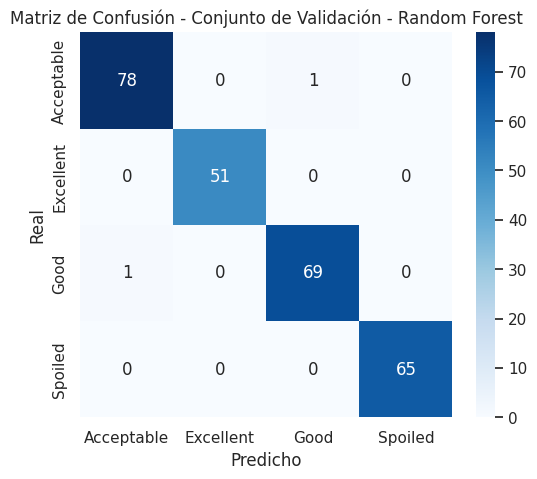

Random Forest - Precisión en Conjunto de Prueba: 0.87
Random Forest - Informe de clasificación en Conjunto de Prueba:
              precision    recall  f1-score   support

  Acceptable       0.86      0.85      0.86       120
   Excellent       0.88      0.93      0.90       120
        Good       0.94      0.79      0.86       120
     Spoiled       0.82      0.93      0.87       120

    accuracy                           0.87       480
   macro avg       0.88      0.87      0.87       480
weighted avg       0.88      0.87      0.87       480



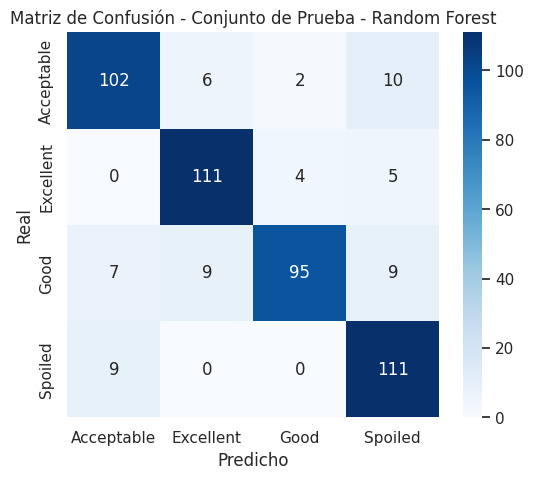

In [ ]:
#####               #####
###### Random Forest
#####               #####
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creación del modelo Random Forest con regularización
model_rf = RandomForestClassifier()

# Validación cruzada en el conjunto de entrenamiento
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_rf, X_train_split, y_train_split, cv=cv, scoring='accuracy')
print(f'Random Forest - Precisión media en validación cruzada: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

# Entrenamiento del modelo
model_rf.fit(X_train_split, y_train_split)

# Predicción en el conjunto de validación
y_val_pred = model_rf.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_class_report = classification_report(y_val_split, y_val_pred)
val_conf_matrix = confusion_matrix(y_val_split, y_val_pred)
print(f'Random Forest - Precisión en Conjunto de Validación: {val_accuracy:.2f}')
print(f'Random Forest - Informe de clasificación en Conjunto de Validación:\n{val_class_report}')

# Visualización de la matriz de confusión para el conjunto de validación
plt.figure(figsize=(6, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val_split), yticklabels=np.unique(y_val_split))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Validación - Random Forest')
plt.show()

# Evaluación en el conjunto de prueba
y_pred = model_rf.predict(X_test_pca)  # Usa X_test_pca para el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Random Forest - Precisión en Conjunto de Prueba: {accuracy:.2f}')
print(f'Random Forest - Informe de clasificación en Conjunto de Prueba:\n{class_report}')

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Prueba - Random Forest')
plt.show()

#*4.0*

---


Selección y estimación de valores para hiperparámetros (incluyendo el tipo de
regularización a usar).


---
En esta fase del proyecto se utiliza un enfoque prácticamente idéntico en todos los casos. Buscamos los hiperparámetros que optimizan cada modelo individual. Para ello utilizamos el método GridSearchCV de sklearn.model. En la variable 'param_grid' introduzco todos los casos de los hiperparámetros a explorar. A continuación, se vuelve a entrenar el modelo con los nuevos hiperparámetros. Para cada modelo se imprimen hiperparámetros que maximizan los resultados


En esta fase del código, buscamos los mejores hiperparámetros para entrenar el modelo. En el caso de los árboles de decisión tenemos:
max_depth: Este parámetro controla la profundidad máxima del árbol de decisión. Limitar la profundidad del árbol puede ayudar a evitar el sobreajuste, que se produce cuando el modelo se ajusta demasiado bien a los datos de entrenamiento y pierde la capacidad de generalizar a nuevos datos. Los valores pueden oscilar entre 1 (árbol muy simple) y Ninguno (sin límite de profundidad).

criterion: este parámetro determina la función de evaluación utilizada para medir la calidad de una división. Las dos opciones más utilizadas son el índice de Gini, que mide lo «puro» que es un nodo y contiene muestras que pertenecen a una sola clase y por lo otro lado, la entropía que se utiliza para medir la impureza, es decir, la cantidad de información que se utiliza para determinar la pureza de un nodo. Por tanto, cuanto mayor sea la entropía, mayor será la incertidumbre respecto a la clase de una muestra elegida al azar de ese nodo.

min_samples_split: este parámetro especifica el número mínimo de muestras necesarias para dividir un nodo. Si un nodo tiene menos muestras que este valor, no se seguirá dividiendo. Los valores más altos pueden conducir a un árbol más simple que es menos susceptible al sobreajuste.

min_samples_leaf: Este parámetro define el número mínimo de muestras que debe tener un nodo hoja que sea un nodo final del árbol que no se subdivida más. Establecer un valor más alto para este parámetro puede ayudar a que el eje sea más robusto y menos propenso al sobreajuste.

A continuación, GridSearchCV realiza la búsqueda real. Realizando una búsqueda con validación cruzada, los datos de entrenamiento se dividirán en 5 partes para cada combinación de parámetros, el modelo se entrenará en 4 pliegues y se probará en el pliegue restante. Este proceso se repetirá 5 veces, cambiando el pliegue de prueba cada vez.

scoring=«accuracy»: Lo utilizo para indicar que queremos evaluar el rendimiento del modelo utilizando la precisión como métrica. La precisión es la proporción de predicciones correctas respecto al número total de predicciones.

n_jobs=-1 permite utilizar todos los núcleos de procesador disponibles para realizar la búsqueda en paralelo, acelerando así el proceso de optimización.

refit=True: permite, después de encontrar los mejores parámetros, volver a entrenar el modelo utilizando todo el conjunto de datos de entrenamiento con los mejores parámetros encontrados.

In [15]:
######              #####
###### Decision Tree      hiperparámetros
######              #####

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definición de la cuadrícula de hiperparámetros para el Árbol de Decisión
param_grid_dt = {
    "max_depth": [1, 2, 3, 5, 10, 20, 50, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Creación del modelo base
model_dt = DecisionTreeClassifier(random_state=42)

# Búsqueda en cuadrícula con validación cruzada (5 pliegues)
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1, refit=True)
grid_search_dt.fit(X_train_split, y_train_split)

# Impresión de los resultados
print(f"Mejores parámetros para Decision Tree: {grid_search_dt.best_params_}")
print(f"Mejor precisión en validación cruzada: {grid_search_dt.best_score_:.2f}")

# Mejor modelo encontrado
best_dt = grid_search_dt.best_estimator_


Mejores parámetros para Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor precisión en validación cruzada: 0.97


Pasemos ahora a la SVM, esta vez el primer parámetro que encontramos es C que es un hiperparámetro de regularización que controla lo bien que el modelo SVM debe intentar clasificar correctamente los datos de entrenamiento. es como un índice de lo bien que el modelo debe ajustarse a los datos de entrenamiento pero con el riesgo de no funcionar bien con nuevos datos, o (con un valor bajo de C) ajustarse menos bien a los datos permitiendo quizás que algunos círculos estén al otro lado de la línea pero con una mejor capacidad de generalización.

El parámetro del kernel determina el modo en que el modelo SVM transforma los datos en un espacio de mayor dimensión para encontrar una línea (o hiperplano) que separe las distintas clases y, de este modo, ayuda a trazar los datos de modo que puedan separarse más fácilmente.
Tenemos tres tipos de kernel: "linear", "rbf", "polinómico":

El Kernel Lineal utiliza una línea recta para separar las clases, que es la mejor solución cuando los datos ya se pueden separar linealmente y se puede trazar una línea recta que divida claramente las dos clases.

El Kernel radial (RBF), por su parte, utiliza una función que crea una forma curva para separar las clases. Es muy flexible y puede adaptarse a formas complejas, y se utiliza cuando los datos no son linealmente separables.


El Kernel polinómico crea una función que puede modelar relaciones no lineales entre clases utilizando polinomios.
La forma general de un kernel polinómico es: K(x,y)=(x⋅y+c)d
Es particularmente adecuado cuando los datos tienen relaciones complejas que pueden ser descritas por polinomios, como cuando los datos forman curvas o formas de U. El polinómico, sin embargo, es mucho menos flexible que rbf


El último parámetro que encontramos es el parámetro gamma, que controla la influencia de cada punto de entrenamiento cuando el modelo intenta separar las clases.

Cuando gamma='escala', el modelo se adapta automáticamente a la distribución y variabilidad de los datos,

Si los datos tienen una gran variedad o dispersión, el modelo utilizará un valor gamma menor, lo que significa que cada punto tendrá una influencia mayor. Esto ayuda a crear un modelo más flexible que puede adaptarse mejor a las diferentes formas y distribuciones de los datos.

Si los datos están más concentrados o son menos variables, el modelo utilizará un valor gamma mayor, lo que significa que cada punto tendrá una influencia más estrecha. Esto puede conducir a decisiones más precisas, pero también a un mayor riesgo de sobreajuste de los datos de entrenamiento.

Cuando gamma= auto el valor gamma es fijo y, por tanto, el modelo no tiene en cuenta la variabilidad de los datos. Puede funcionar bien en algunas situaciones, pero puede no ser óptimo si los datos tienen una distribución compleja o variable. Como no se ajusta automáticamente, puede dar lugar a resultados menos precisos en situaciones en las que los datos no siguen una distribución uniforme.

Sigue el procedimiento habitual y guarda el mejor modelo entrenado en best_svm

In [20]:
######    ######
###### SVM       hiperparámetros
######    ######


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definición de la cuadrícula de hiperparámetros para SVM
param_grid_svm = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

# Creación del modelo
model_svm = SVC(probability=True, random_state=42)

# Búsqueda en cuadrícula con validación cruzada (5 pliegues)
grid_search_svm = GridSearchCV(model_svm, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_svm.fit(X_train_split, y_train_split)

# Impresión de los resultados
print(f"Mejores parámetros para SVM: {grid_search_svm.best_params_}")
print(f"Mejor precisión en validación cruzada: {grid_search_svm.best_score_:.2f}")

# Mejor modelo encontrado
best_svm = grid_search_svm.best_estimator_

Mejores parámetros para SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor precisión en validación cruzada: 1.00


Los parámetros del «random forest» son los mismos que para el «decision tree», pero en este caso añadimos n_estimators que representa el número de árboles de decisión que componen el «random forest». Cuanto mayor sea el número de árboles, más robusto y preciso será el modelo, ya que al promediar las predicciones de varios árboles se tiende a reducir la varianza.

Aunque los demás parámetros son los mismos, el contexto cambia a medida que el bosque aleatorio combina las predicciones de múltiples árboles, lo que puede influir en cómo interactúan estos parámetros y cómo afectan al rendimiento general del modelo.

Para no ser repetitivo, me remito al árbol de decisión para una explicación de lo que representa cada parámetro

Los mejores parámetros encontrados para el modelo Random Forest indican un enfoque equilibrado entre complejidad y generalización. La impureza de Gini se utiliza como criterio, y la profundidad máxima de cada árbol se fijó en 20. Este límite ayuda a controlar la complejidad de los árboles, pero es un límite relativamente profundo, que permite captar relaciones complejas en los datos. Este límite ayuda a controlar la complejidad de los árboles, pero es un límite relativamente profundo, que permite a los árboles captar relaciones complejas en los datos. Sin embargo, no es tan profundo como para arriesgarse a sobreajustar los datos de entrenamiento.
min_samples_leaf: 1: indica que cada hoja debe contener al menos 1 muestra y que, en consecuencia, no hay ninguna restricción sobre el número mínimo de muestras en una hoja.

Los árboles son, por tanto, muy flexibles y pueden ajustarse bien a los datos. Sin embargo, también puede aumentar el riesgo de sobreajuste, ya que los árboles pueden crear hojas con pocas muestras, lo que puede no generalizar bien a nuevos datos.



min_samples_split = 2: estipula que un nodo debe tener al menos 2 muestras para poder dividirse más, lo que ayuda a garantizar que los nodos no se dividan en exceso, lo que puede ayudar a reducir el sobreajuste. Este valor es un buen compromiso entre la creación de árboles complejos y la necesidad de mantener cierta generalización.

n_estimators = 50 significa que el modelo utilizará 50 árboles de decisión para hacer predicciones, lo que es un buen número para garantizar que el modelo es robusto y las predicciones son estables. Más árboles pueden mejorar la precisión del modelo, pero también requieren más recursos computacionales. 50 es un compromiso común entre rendimiento y coste computacional.

In [21]:
#####               #####
###### Random Forest     hiperparámetros
#####               #####


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definición de la cuadrícula de hiperparámetros para Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [5, 10, 20, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Creación del modelo
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Búsqueda en cuadrícula con validación cruzada (5 pliegues)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train_split, y_train_split) #necesita mucho tiempo (14min)

# Impresión de los resultados
print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Mejor precisión en validación cruzada: {grid_search_rf.best_score_:.2f}")

# Mejor modelo encontrado
best_rf = grid_search_rf.best_estimator_


Mejores parámetros para Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor precisión en validación cruzada: 0.99


#*5.0*

---


Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


---

Llegamos ahora a la fase final del proyecto. Aquí los modelos llegan ya entrenados con los nuevos hiperparámetros. En esta fase sólo nos concentramos en volver a probar el modelo en el conjunto de validación y prueba. A continuación, tras imprimir los resultados con las distintas métricas, éstas se visualizan.

En general, puede decirse que los modelos abordan muy bien el problema de la clasificación. Para ello contamos con la gran ayuda de un conjunto de datos muy pequeño y una estructura bastante sencilla, lo que nos lleva a unos resultados prácticamente perfectos.

En una fase de prueba que no se muestra, los modelos también se probaron con datos menos preprocesados. Se obtuvieron resultados suficientes incluso sin reducción de la dimensionalidad o con menos reducción de valores atípicos. Obviamente, para mayor exhaustividad y mejores resultados, se utilizaron todas las técnicas disponibles para encontrar el mayor rendimiento

Veamos ahora el modelo de árbol de decisión en su forma final.

Por desgracia, los hiperparámetros no ayudaron a mejorar los resultados obtenidos anteriormente. Una vez más, el modelo obtiene mejores resultados en la evaluación en el conjunto de validación.
Analicemos ahora los resultados con los nuevos hiperparámetros, en cuanto al conjunto de validación, la precisión es muy alta (96%), lo que indica que el modelo se comportó bien al clasificar los datos con los que fue entrenado y validado.

En cuanto al informe de clasificación en la clase aceptable tenemos:

Precisión: 0,93, Recall: 0,96, F1-score: 0,94

Son resultados muy buenos, pero hay una ligera mejora potencial en la precisión, ya que el modelo clasifica un 7% de instancias como «Aceptable», cuando en realidad no lo son.

En cambio, en Excelente los resultados mejoran considerablemente, tenemos

Precisión: 0,98, Recall: 1,00, F1-score: 0,99

Por tanto, la identificación de la clase «Excelente» es casi perfecta. La recuperación del 100% indica que todos los casos de «Excelente» se han clasificado correctamente.

Buena: Precisión: 0,98, Recuperación: 0,91, Puntuación F1: 0,95

También en este caso tenemos un gran rendimiento, aunque la recuperación es ligeramente inferior, lo que sugiere que algunos casos de «Bueno» podrían clasificarse como otra clase.

Estropeada:

Precisión: 0,97, Recuperación: 0,98, Puntuación F1: 0,98

Buenos resultados con una muy buena identificación de la clase.

Métricas agregadas:

Promedio macro: Buen rendimiento en todas las clases, lo que sugiere que el modelo tiene un comportamiento equilibrado.

Media ponderada: Las métricas ponderadas también son sólidas (0,96), lo que indica que el rendimiento es uniformemente bueno, influido por el tamaño de cada clase.

A continuación se muestra una representación del árbol que parece bien equilibrada, con decisiones que conducen a una buena separación de clases. En el nodo raíz identificamos la primera condición inicial que es Característica 2 > 0,009. A partir de aquí separamos los datos en dos grupos: los que cumplen la condición y los que no. El valor de entropía es el más alto y es igual a 1,981

Árbol de Decisión Optimizado - Precisión en el Conjunto de Validación: 0.96
Reporte de clasificación en el Conjunto de Validación:
              precision    recall  f1-score   support

  Acceptable       0.93      0.96      0.94        79
   Excellent       0.98      1.00      0.99        51
        Good       0.98      0.91      0.95        70
     Spoiled       0.97      0.98      0.98        65

    accuracy                           0.96       265
   macro avg       0.97      0.97      0.96       265
weighted avg       0.96      0.96      0.96       265

Árbol de Decisión Optimizado - Precisión en el Conjunto de Prueba: 0.79
Reporte de clasificación en el Conjunto de Prueba:
              precision    recall  f1-score   support

  Acceptable       0.68      0.80      0.74       120
   Excellent       0.87      0.87      0.87       120
        Good       0.82      0.78      0.80       120
     Spoiled       0.80      0.70      0.75       120

    accuracy                           

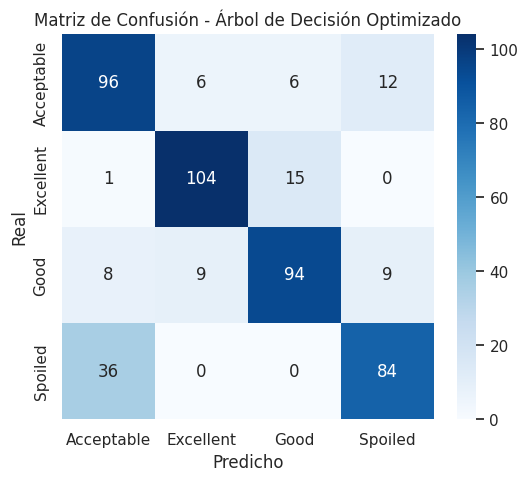

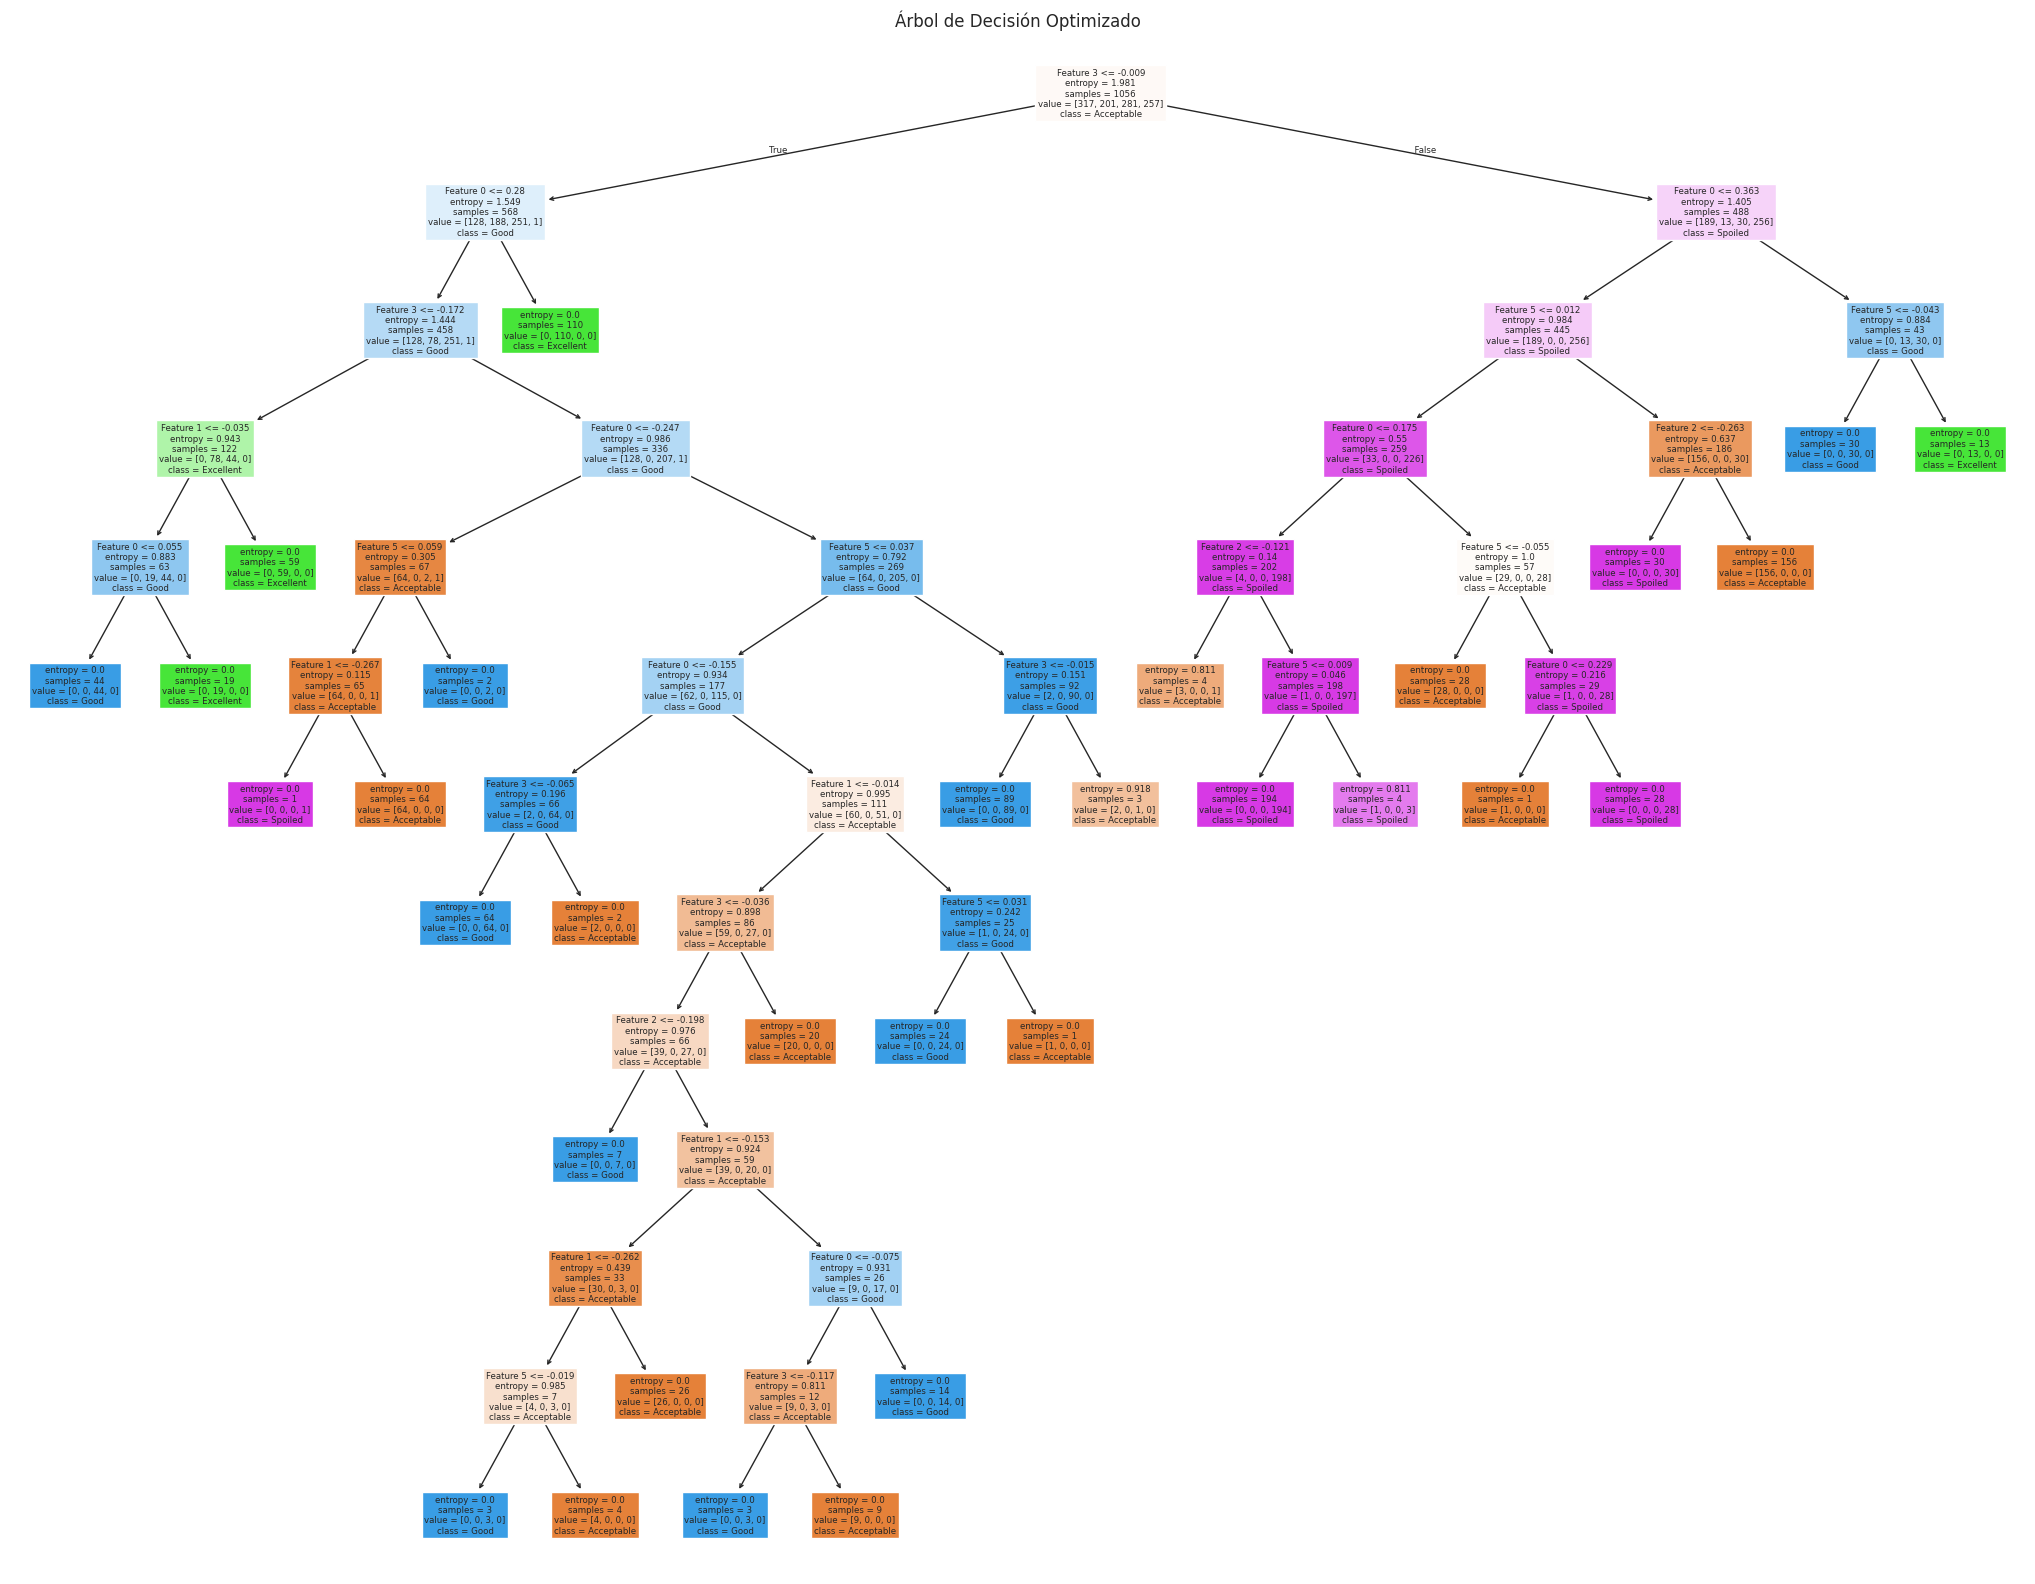

In [18]:
######              #####
###### Decision Tree - Final
######              #####

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluación en el conjunto de validación
y_val_pred = best_dt.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_class_report = classification_report(y_val_split, y_val_pred)
print(f'Árbol de Decisión Optimizado - Precisión en el Conjunto de Validación: {val_accuracy:.2f}')
print(f'Reporte de clasificación en el Conjunto de Validación:\n{val_class_report}')

# Evaluación en el conjunto de prueba
y_pred = best_dt.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Árbol de Decisión Optimizado - Precisión en el Conjunto de Prueba: {accuracy:.2f}')
print(f'Reporte de clasificación en el Conjunto de Prueba:\n{class_report}')

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión Optimizado')
plt.show()

# Visualización del árbol de decisión
plt.figure(figsize=(26, 20))
plot_tree(best_dt, filled=True, feature_names=[f'Feature {i}' for i in range(X_train_split.shape[1])], class_names=np.unique(y_train_split).astype(str))
plt.title("Árbol de Decisión Optimizado")
plt.show()

Con SVM encontramos el caso en el que los hiperparámetros llevan el modelo a la perfección. El modelo tiene la máxima precisión y no falla en ninguna evaluación en el conjunto de evaluación, puede tratarse de un caso de sobreajuste, pero es comprensible debido al pequeño tamaño del conjunto de datos.

En el conjunto de pruebas, encontramos un claro deterioro, pero en comparación con el árbol de decisión, es mucho mejor. La precisión del modelo en el conjunto de pruebas aumenta hasta el 89% frente al 79% del ultimo modelo. En general, el informe de clasificación muestra la clase «buena» con una precisión muy alta, pero la recall relativamente baja sugiere que algunos casos de «buena» se clasificaron erróneamente como otras clases.

Las medias generales Macro Media: 0,89 y Media ponderada: 0,89 confirman que el modelo tiene un rendimiento equilibrado entre las clases, sin favorecer excesivamente a unas sobre otras. En general, un buen rendimiento

SVM Optimizado - Precisión en el Conjunto de Validación: 1.00
Reporte de clasificación en el Conjunto de Validación:
              precision    recall  f1-score   support

  Acceptable       1.00      1.00      1.00        79
   Excellent       1.00      1.00      1.00        51
        Good       1.00      1.00      1.00        70
     Spoiled       1.00      1.00      1.00        65

    accuracy                           1.00       265
   macro avg       1.00      1.00      1.00       265
weighted avg       1.00      1.00      1.00       265

SVM Optimizado - Precisión en el Conjunto de Prueba: 0.89
Reporte de clasificación en el Conjunto de Prueba:
              precision    recall  f1-score   support

  Acceptable       0.86      0.87      0.86       120
   Excellent       0.89      0.98      0.93       120
        Good       0.98      0.78      0.87       120
     Spoiled       0.85      0.93      0.89       120

    accuracy                           0.89       480
   macro avg 

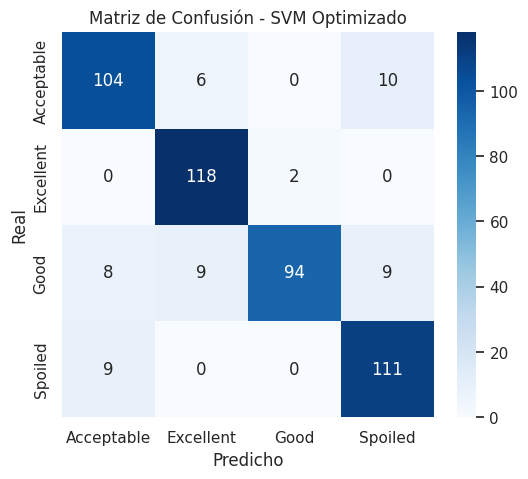

In [26]:
######    ######
###### SVM      Final
######    ######

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluación en el conjunto de validación
y_val_pred = best_svm.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_class_report = classification_report(y_val_split, y_val_pred)
print(f'SVM Optimizado - Precisión en el Conjunto de Validación: {val_accuracy:.2f}')
print(f'Reporte de clasificación en el Conjunto de Validación:\n{val_class_report}')

# Evaluación en el conjunto de prueba
y_test_pred = best_svm.predict(X_test_pca)  # Usa X_test_pca para el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
print(f'SVM Optimizado - Precisión en el Conjunto de Prueba: {test_accuracy:.2f}')
print(f'Reporte de clasificación en el Conjunto de Prueba:\n{test_class_report}')

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(6, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM Optimizado')
plt.show()

En este caso seguimos en un ligero overfitting en el conjunto de validación, que a diferencia del caso anterior, esta vez comete algunos errores.

Si observamos los resultados en la prueba, el random forest no consigue tomar la delantera en la comparación de nuestros modelos, limitándose al segundo puesto con una tasa de precisión del 88%. Una vez más destaca una precisión muy alta en la clase bueno, pero la recuperación relativamente baja sugiere que muchos casos de «Bueno» se clasificaron como otras clases, lo que indica una posible confusión con las clases vecinas.

Se ofrece una tabla que muestra la importancia de los componentes. Observamos que, a pesar de haber aplicado una reducción de la dimensionalidad, la tercera característica es mucho más relevante que las demás

Random Forest Optimizado - Precisión en el Conjunto de Validación: 1.00
Reporte de clasificación en el Conjunto de Validación:
              precision    recall  f1-score   support

  Acceptable       0.99      1.00      0.99        79
   Excellent       1.00      1.00      1.00        51
        Good       1.00      0.99      0.99        70
     Spoiled       1.00      1.00      1.00        65

    accuracy                           1.00       265
   macro avg       1.00      1.00      1.00       265
weighted avg       1.00      1.00      1.00       265

Random Forest Optimizado - Precisión en el Conjunto de Prueba: 0.88
Reporte de clasificación en el Conjunto de Prueba:
              precision    recall  f1-score   support

  Acceptable       0.89      0.86      0.87       120
   Excellent       0.88      0.93      0.90       120
        Good       0.92      0.78      0.84       120
     Spoiled       0.85      0.97      0.90       120

    accuracy                           0.88    

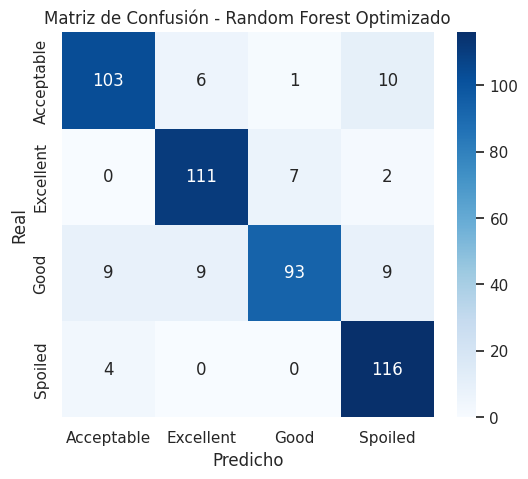

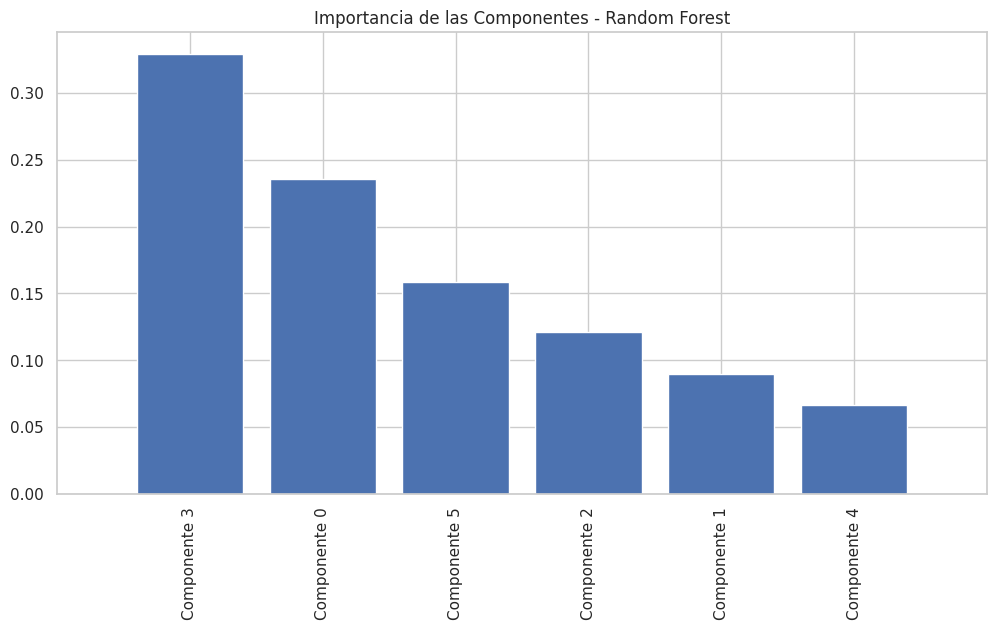

In [28]:
#####               #####
###### Random Forest     Final
#####               #####
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluación en el conjunto de validación
y_val_pred = best_rf.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_class_report = classification_report(y_val_split, y_val_pred)
print(f'Random Forest Optimizado - Precisión en el Conjunto de Validación: {val_accuracy:.2f}')
print(f'Reporte de clasificación en el Conjunto de Validación:\n{val_class_report}')

# Evaluación en el conjunto de prueba
y_test_pred = best_rf.predict(X_test_pca)  # Usa X_test_pca para el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
print(f'Random Forest Optimizado - Precisión en el Conjunto de Prueba: {test_accuracy:.2f}')
print(f'Reporte de clasificación en el Conjunto de Prueba:\n{test_class_report}')

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(6, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.show()

# Visualización de la importancia de las características
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [f'Componente {i}' for i in range(X_train_split.shape[1])]  # Asegúrate de tener el número correcto de características

plt.figure(figsize=(12, 6))
plt.title("Importancia de las Componentes - Random Forest")
plt.bar(range(X_train_split.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_split.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train_split.shape[1]])
plt.show()

La máquina de vectores soporte resulta ser el modelo con mayor precisión para este problema de clasificación con su 89% de precisión